In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from bertopic import BERTopic

/projekte/semrel/WORK-AREA/Users/filip/conda/envs/aclantho/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load trained topic model
topic_model = BERTopic.load('/resources/models/cacl-ocl/topic_model.pkl')

In [3]:
# Explore topic info
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2373,0_translation_machine_mt_nmt,"[translation, machine, mt, nmt, the, neural, q...",[Improving Translation of Out Of Vocabulary Wo...
1,1,1735,1_visual_multimodal_image_images,"[visual, multimodal, image, images, and, the, ...",[Multimodal Neural Machine Translation with Se...
2,2,1852,2_dialogue_dialog_conversational_to,"[dialogue, dialog, conversational, to, respons...",[{U}ni{C}onv: A Unified Conversational Neural ...
3,3,1473,3_medical_clinical_biomedical_the,"[medical, clinical, biomedical, the, and, of, ...",[{B}io{BERT}pt - A {P}ortuguese Neural Languag...
4,4,1163,4_speech_asr_recognition_translation,"[speech, asr, recognition, translation, the, a...",[{RSC}: A {R}omanian Read Speech Corpus for Au...
...,...,...,...,...,...
65,65,387,65_news_fake_detection_misinformation,"[news, fake, detection, misinformation, media,...",[A Survey on Natural Language Processing for F...
66,66,133,66_change_semantic_word_lexical,"[change, semantic, word, lexical, words, time,...",[Definition generation for lexical semantic ch...
67,67,117,67_humor_humorous_offense_pun,"[humor, humorous, offense, pun, edited, headli...",[{CH}o{R}a{L}: Collecting Humor Reaction Label...
68,68,143,68_codeswitching_codemixed_codeswitched_cs,"[codeswitching, codemixed, codeswitched, cs, c...",[{PHINC}: A Parallel {H}inglish Social Media C...


In [4]:
df = pd.read_parquet('/resources/models/cacl-ocl/topic_model_papers.parquet')

In [5]:
# Number of papers per topic split per time period
time_df = pd.DataFrame(df.groupby('Name')['time'].value_counts())
time_df = time_df.reset_index().pivot(index='Name', columns='time', values='count').reset_index()

# Raw total number of papers per topic
time_df['total_t1t2'] = time_df['t1'] + time_df['t2']

# Map time period -> total number of papers
total_times = df['time'].value_counts().to_dict()

# Normalized number of papers per topic for each time period
time_df['perc_in_t1'] = time_df['t1'] / time_df['total_t1t2'] * 100
time_df['perc_in_t2'] = time_df['t2'] / time_df['total_t1t2'] * 100

# Normalized total number of papers per topic
time_df['total_t1t2_norm'] = time_df['perc_in_t1'] + time_df['perc_in_t2']

# Percentage of papers (based on normalized paper counts) from t1/t2 in each topic
time_df['perc_in_t1_norm'] = time_df['perc_in_t1'] / time_df['total_t1t2_norm'] * 100
time_df['perc_in_t2_norm'] = time_df['perc_in_t2'] / time_df['total_t1t2_norm'] * 100

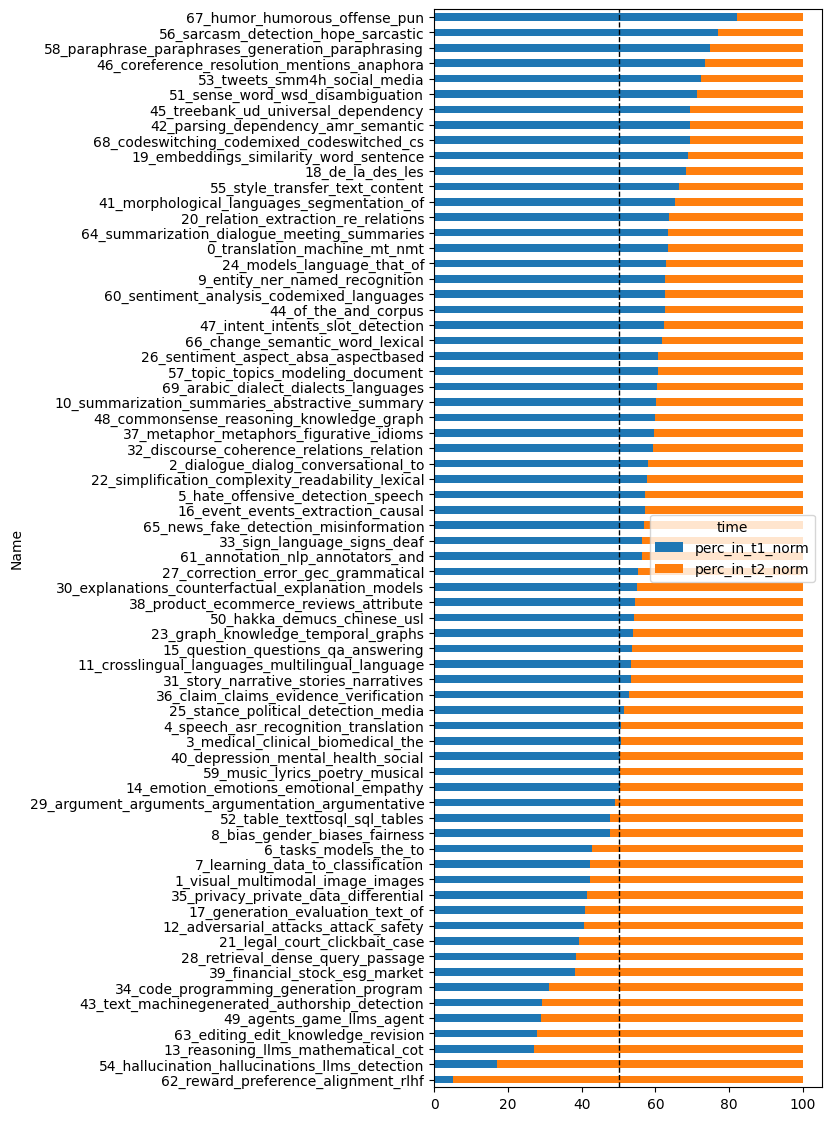

In [6]:
fig, ax = plt.subplots(figsize=(5, 14))
plot_df = time_df.sort_values('perc_in_t1').set_index('Name')[['perc_in_t1_norm', 'perc_in_t2_norm']]
plot_df.plot(kind='barh', stacked=True, ax=ax)
ax.axvline(x=50, c='k', ls='--', lw=1)
plt.show()